In [21]:
import json
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
with open('mycareersfuture.json') as json_file:
    data = json.load(json_file)
 
    # Print the type of data variable
    print("Type:", type(data))
    print(data['jobs'][0].keys())
    print(data['jobs'][0]['skills_required'])
    print('skills_required' in data['jobs'][0].keys())

Type: <class 'dict'>
dict_keys(['company_name', 'job_title', 'employment_type', 'seniority', 'job_category', 'location', 'salary', 'min_experience', 'skills_required', 'requirements_and_role', 'job_requirements', 'company_info', 'posting_date', 'expiry_date', 'no_of_applications', 'job_id'])
['Access', 'Customer Service', 'Data Entry', 'Employee Relations', 'English', 'Event Planning', 'Human Resources', 'Leadership', 'Management', 'Microsoft Excel', 'Microsoft Office', 'Microsoft Word', 'Outlook', 'PowerPoint', 'Public Speaking', 'Research', 'Social Media', 'Team Leadership', 'Teamwork', 'Time Management']
True


In [3]:
count = 0
skills = []
for job in data['jobs']:
    skills = skills + list(job['skills_required'])
print(len(np.unique(skills)))

2548


In [4]:
skill_count = {}
for skill in np.unique(skills):
    skill_count[skill] = skills.count(skill)

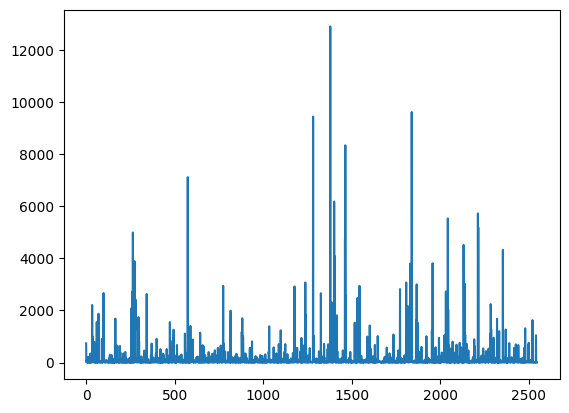

In [24]:
plt.plot(skill_count.values())

In [36]:
N = 20

top_skill = sorted(skill_count, key=skill_count.get, reverse=True)[:N]

In [37]:
top_skill

['Management',
 'Project Management',
 'Leadership',
 'Microsoft Office',
 'Customer Service',
 'Marketing',
 'Strategic Planning',
 'Sales',
 'Strategy',
 'Business Development',
 'Microsoft Excel',
 'Social Media',
 'Training',
 'Marketing Strategy',
 'Business Strategy',
 'Research',
 'Program Management',
 'Java',
 'Process Improvement',
 'Software Development']

In [38]:
skill_dict = {}
for skill in top_skill:
    skill_dict[skill] = []
skill_dict['job_txt'] = []

In [39]:
for job in data['jobs']:
    for skill in skill_dict.keys():
        if skill == 'job_txt':
            skill_dict[skill].append(job['requirements_and_role'] + ' ' + job['job_requirements']) 
        elif skill in job['skills_required']:
            skill_dict[skill].append(1) 
        else:
            skill_dict[skill].append(0) 

In [40]:
df = pd.DataFrame(skill_dict)
train, test = train_test_split(df, test_size=0.2)
x_train = train['job_txt']
x_test = test['job_txt']

In [41]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
precision_list = []
recall_list = []
for category in top_skill:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(x_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(x_test)
    precision_list.append(precision_score(test[category], prediction))
    recall_list.append(recall_score(test[category], prediction))
print("Precision: ",sum(precision_list)/len(precision_list))
print("Recall: ",sum(recall_list)/len(recall_list))

... Processing Management
... Processing Project Management
... Processing Leadership
... Processing Microsoft Office
... Processing Customer Service
... Processing Marketing
... Processing Strategic Planning
... Processing Sales
... Processing Strategy
... Processing Business Development
... Processing Microsoft Excel
... Processing Social Media
... Processing Training
... Processing Marketing Strategy
... Processing Business Strategy
... Processing Research
... Processing Program Management
... Processing Java
... Processing Process Improvement
... Processing Software Development
Precision:  0.658868994328864
Recall:  0.53717643859823
